<a href="https://colab.research.google.com/github/enjolimarie/Projects-in-AI-ML/blob/main/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Task 1

You are required to read the documentation provided in this repository and experiment with
the RNN model. This is a legacy repository; therefore, one task would be to research and use a
recent version. Train the model on ‘tiny Shakespeare’ dataset available at the same location.
Create outputs of the model after training for i) 5 epochs ii) 50 epochs and iii) 500 epochs. What
significant difference do you observe between the 3 outputs? Explain. Repeat the experiment
with the LSTM model provided in the repository. Explain the differences and/or similarities
between the results of both models.

Here is the repo I have used:

https://github.com/nikhilbarhate99/Char-RNN-PyTorch.git /content/drive/MyDrive/Char-RNN-PyTorch

In [ ]:
# Cloning Repo
!git clone https://github.com/nikhilbarhate99/Char-RNN-PyTorch.git /content/drive/MyDrive/Char-RNN-PyTorch


fatal: destination path '/content/drive/MyDrive/Char-RNN-PyTorch' already exists and is not an empty directory.


I was having trouble running the other code so I found a more recent code that is running.

In [7]:
# CD into the Repo
%cd /content/drive/MyDrive/Char-RNN-PyTorch


/content/drive/MyDrive/Char-RNN-PyTorch


In [ ]:
# Altered code to save checkpoints at 5, 50, and 500 epochs and let it run
!python CharRNN.py

Streaming output truncated to the last 5000 lines.
Shall rave able.

HORTENSIO:
What wis was weuse? Offect our dolling and caugh
for his worse and my father subject, you goes
Of a truth. Come, Signament; no, or rist
To crow the fall of was
----------------------------------------
Epoch: 120 	 Loss: 1.24324463
----------------------------------------
God,
I saw bloody, whose poison which in her daughter will see
I do, see offended and freshes.

SEBASTIAN:
Ha, mountain of Carthaging out of us,
You blow or odd of preparad mortality
To sesses and--
Sh
----------------------------------------
Epoch: 121 	 Loss: 1.24851163
----------------------------------------

When now, I'll a quantest.' even thou canst ill:
when she cause are come my lute, thou
advantagi, and wish'd fart.

LUCENTIO:
Put me;
Then better spoil'd in Stold here-bed again.

PROSPERO:
Side to be
----------------------------------------
Epoch: 122 	 Loss: 1.24928561
----------------------------------------
le
Whol nothing the 

In [8]:
#Test for checkpoint 5
!python test.py --checkpoint "/content/drive/MyDrive/Char-RNN-PyTorch/preTrained/CharRNN_shakespeare_5.pth" --data_path "/content/shakespeare.txt"


----------------------------------------
Data has 1115394 characters, 65 unique
----------------------------------------
/content/drive/MyDrive/Char-RNN-PyTorch/test.py:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any i

In [9]:
#Test for Checkpoint 50
!python test.py --checkpoint "/content/drive/MyDrive/Char-RNN-PyTorch/preTrained/CharRNN_shakespeare_50.pth" --data_path "/content/shakespeare.txt"

----------------------------------------
Data has 1115394 characters, 65 unique
----------------------------------------
/content/drive/MyDrive/Char-RNN-PyTorch/test.py:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any i

In [10]:
# Test for Checkpoint 500
!python test.py --checkpoint "/content/drive/MyDrive/Char-RNN-PyTorch/preTrained/CharRNN_shakespeare_500.pth" --data_path "/content/shakespeare.txt"

----------------------------------------
Data has 1115394 characters, 65 unique
----------------------------------------
/content/drive/MyDrive/Char-RNN-PyTorch/test.py:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any i

The link in which I am using the LSTM
https://github.com/sinha96/LSTM/tree/master

In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM
from tensorflow.keras.optimizers import RMSprop

# Make sure I am in proper working directory
os.chdir('/content')

# Checking that the Shakespeare file exists
file_path = '/content/shakespeare.txt'
if not os.path.exists(file_path):
    raise FileNotFoundError("shakespeare.txt not found. Upload.")
else:
    print("Found file at:", file_path)

def load_data(file_path, seq_length):
   # Loads text from the file, creates a vocabulary mapping,
   # and constructs input sequences and target characters.
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()

    # Building vocabulary
    chars = sorted(list(set(text)))
    vocab_size = len(chars)
    print(f"Data has {len(text)} characters, {vocab_size} unique characters.")

    # Creating mapping dictionaries
    char_to_ix = {ch: i for i, ch in enumerate(chars)}
    ix_to_char = {i: ch for i, ch in enumerate(chars)}

    # Converting text into integer sequence
    data = [char_to_ix[ch] for ch in text]

    # Building sequences and targets
    X, Y = [], []
    for i in range(0, len(data) - seq_length):
        X.append(data[i:i+seq_length])
        Y.append(data[i+seq_length])
    return np.array(X), np.array(Y), char_to_ix, ix_to_char, vocab_size, text

class MyLSTM:
    def __init__(self, vocab_size, seq_length, embedding_dim=256, lstm_units=128):
        self.vocab_size = vocab_size
        self.seq_length = seq_length
        self.model = Sequential()
        # Define the layers including input_length
        self.model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=seq_length))
        self.model.add(LSTM(lstm_units))
        self.model.add(Dropout(0.5))
        #Changed from sigmoid to softmax
        self.model.add(Dense(vocab_size, activation='softmax'))
        self.model.compile(loss='sparse_categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
        # Explicitly build the model to set up input shapes.
        self.model.build(input_shape=(None, seq_length))
        self.model.summary()

    def train(self, X, Y, epochs, batch_size):
        self.model.fit(X, Y, epochs=epochs, batch_size=batch_size)

    def sample(self, seed, length, char_to_ix, ix_to_char):
       # Given a seed string: generating text of the given length

        generated = seed
        for i in range(length):
            # Prepare input: use last seq_length characters (pad if needed)
            input_seq = [char_to_ix.get(c, 0) for c in generated[-self.seq_length:]]
            if len(input_seq) < self.seq_length:
                input_seq = [0] * (self.seq_length - len(input_seq)) + input_seq
            input_seq = np.array(input_seq).reshape(1, self.seq_length)
            preds = self.model.predict(input_seq, verbose=0)[0]
            next_index = np.argmax(preds)
            next_char = ix_to_char[next_index]
            generated += next_char
        return generated

def save_checkpoint(model_obj, filename):
    # Saving model weights
    model_obj.model.save_weights(filename)
    print("Checkpoint saved at:", filename)

def main():
    # Hyperparameters
    seq_length = 100
    lstm_units = 256
    total_epochs = 500
    batch_size = 128

    # Load data from shakespeare.txt
    X, Y, char_to_ix, ix_to_char, vocab_size, raw_text = load_data(file_path, seq_length)

    # Initializing custom LSTM model
    my_model = MyLSTM(vocab_size=vocab_size, seq_length=seq_length, lstm_units=lstm_units)

    # Train one epoch at a time to save checkpoints and sample text at key epochs
    for epoch in range(1, total_epochs + 1):
        print(f"\n--- Starting epoch {epoch} ---")
        my_model.train(X, Y, epochs=1, batch_size=batch_size)

        if epoch in [5, 50, 500]:
            print(f"\n--- Sample text at epoch {epoch} ---")
            seed = raw_text[:seq_length]
            sample_text = my_model.sample(seed, length=400, char_to_ix=char_to_ix, ix_to_char=ix_to_char)
            print(sample_text)
            # Ensure the filename ends with .weights.h5
            checkpoint_filename = f"checkpoint_epoch_{epoch}.weights.h5"
            save_checkpoint(my_model, checkpoint_filename)

    print("\n--- Final Generated Text ---")
    seed = raw_text[:seq_length]
    final_text = my_model.sample(seed, length=400, char_to_ix=char_to_ix, ix_to_char=ix_to_char)
    print(final_text)

# Run the training and generation process
main()


Found file at: /content/shakespeare.txt
Data has 1115394 characters, 65 unique characters.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 100, 256)            │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 256)                 │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 65)                  │          16,705 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 558,657 (2.13 MB)

 Trainable params: 558,657 (2.13 MB)

 Non-trainable params: 0 (0.00 B)


--- Starting epoch 1 ---
8714/8714 ━━━━━━━━━━━━━━━━━━━━ 72s 8ms/step - accuracy: 0.3605 - loss: 2.2647

--- Starting epoch 2 ---
8714/8714 ━━━━━━━━━━━━━━━━━━━━ 71s 8ms/step - accuracy: 0.5017 - loss: 1.7082

--- Starting epoch 3 ---
8714/8714 ━━━━━━━━━━━━━━━━━━━━ 70s 8ms/step - accuracy: 0.5285 - loss: 1.6089

--- Starting epoch 4 ---
8714/8714 ━━━━━━━━━━━━━━━━━━━━ 71s 8ms/step - accuracy: 0.5411 - loss: 1.5626

--- Starting epoch 5 ---
8714/8714 ━━━━━━━━━━━━━━━━━━━━ 70s 8ms/step - accuracy: 0.5475 - loss: 1.5349

--- Sample text at epoch 5 ---
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You have the sentent to the sear to the sentent
That the sentent to the sear to the seat,
And the sentent to the seal that the sentent,
And the sentent to the seal that the sentent,
And the sentent to the seal that the sentent,
And the sentent to the seal that the sentent,
And the sentent to the seal that the sentent,
And the sentent to the seal tha

In [5]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM
from tensorflow.keras.optimizers import RMSprop


#Helper Functions to see the checkpoints from code above
def load_data(file_path, seq_length):
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()
    chars = sorted(list(set(text)))
    vocab_size = len(chars)
    print(f"Data has {len(text)} characters, {vocab_size} unique characters.")
    char_to_ix = {ch: i for i, ch in enumerate(chars)}
    ix_to_char = {i: ch for i, ch in enumerate(chars)}
    data = [char_to_ix[ch] for ch in text]
    X, Y = [], []
    for i in range(0, len(data) - seq_length):
        X.append(data[i:i+seq_length])
        Y.append(data[i+seq_length])
    return np.array(X), np.array(Y), char_to_ix, ix_to_char, vocab_size, text
#Same Code from above
class MyLSTM:
    def __init__(self, vocab_size, seq_length, embedding_dim=256, lstm_units=128):
        self.vocab_size = vocab_size
        self.seq_length = seq_length
        self.model = Sequential()
        self.model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=seq_length))
        self.model.add(LSTM(lstm_units))
        self.model.add(Dropout(0.5))
        self.model.add(Dense(vocab_size, activation='softmax'))
        self.model.compile(loss='sparse_categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
        # Explicitly build the model so weights are created.
        self.model.build(input_shape=(None, seq_length))

    def sample(self, seed, length, char_to_ix, ix_to_char):
        """
        Generates text of a given length starting from the seed.
        """
        generated = seed
        for i in range(length):
            input_seq = [char_to_ix.get(c, 0) for c in generated[-self.seq_length:]]
            if len(input_seq) < self.seq_length:
                input_seq = [0] * (self.seq_length - len(input_seq)) + input_seq
            input_seq = np.array(input_seq).reshape(1, self.seq_length)
            preds = self.model.predict(input_seq, verbose=0)[0]
            next_index = np.argmax(preds)
            next_char = ix_to_char[next_index]
            generated += next_char
        return generated


#Testing Checkpoints
# Define the file path and sequence length.
file_path = '/content/shakespeare.txt'
seq_length = 100

# Reload the data and mappings.
X, Y, char_to_ix, ix_to_char, vocab_size, raw_text = load_data(file_path, seq_length)

# List of checkpoint filenames (adjust if necessary).
checkpoints = [
    "checkpoint_epoch_5.weights.h5",
    "checkpoint_epoch_50.weights.h5",
    "checkpoint_epoch_500.weights.h5"
]

# Iterate over each checkpoint, load weights into a fresh model instance, and generate sample text.
for cp in checkpoints:
    if os.path.exists(cp):
        print(f"\n--- Loading checkpoint: {cp} ---")
        test_model = MyLSTM(vocab_size=vocab_size, seq_length=seq_length, lstm_units=256)
        test_model.model.load_weights(cp)
        seed = raw_text[:seq_length]
        sample_text = test_model.sample(seed, length=400, char_to_ix=char_to_ix, ix_to_char=ix_to_char)
        print(f"Generated text from checkpoint {cp}:\n")
        print(sample_text)
        print("\n" + "="*80 + "\n")
    else:
        print(f"Checkpoint file {cp} not found.")


Data has 1115394 characters, 65 unique characters.

--- Loading checkpoint: checkpoint_epoch_5.weights.h5 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 8 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Generated text from checkpoint checkpoint_epoch_5.weights.h5:

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You have the sentent to the sear to the sentent
That the sentent to the sear to the seat,
And the sentent to the seal that the sentent,
And the sentent to the seal that the sentent,
And the sentent to the seal that the sentent,
And the sentent to the seal that the sentent,
And the sentent to the seal that the sentent,
And the sentent to the seal that the sentent,
And the sentent to the seal that the 



--- Loading checkpoint: checkpoint_epoch_50.weights.h5 ---
Generated text from checkpoint checkpoint_epoch_50.weights.h5:

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You shall be so so so so so so so soul
That the state and the state and the state,
And the state and the state and the state,
And the state and the state and the state,
And the state and the state and the state,
A

## Observations of Part 1:

 Speaking upon the Hyperparameters:

  The TensorFlow/Keras version uses a single LSTM layer with 256 units and an embedding dimension of 256 along with dropout, making it lightweight and fast. The PyTorch CharRNN uses a three-layer LSTM stack with a larger hidden size of 512 and an embedding layer sized to the vocabulary, which increases its computational complexity and slows training. Due to the long runtime and high GPU usage, I ran the LSTM with smaller parameters, so the comparison might not be fully accurate when matching the two models' full configurations.


Speaking on the Results:

The LSTM model's generated text remains more consistent across checkpoints with output from checkpoint 5 already showing a stable, repetitive structure. To contrast, the CharRNN outputs display more variation in style and content between checkpoints. The CharRNN at checkpoint 5 produces somewhat coherent yet garbled text while by checkpoint 50 and 500 the output becomes erratic with distorted words and random punctuation. This behavior may be due to the deeper architecture of the CharRNN which uses three layers and a larger hidden state that requires more fine-tuning to stabilize generation quality.

The simpler LSTM architecture in TensorFlow Keras appears to capture consistent patterns early in training, perhaps because of its lighter design and lower computational overhead. In addition the fact that smaller parameters had to be used in the LSTM model because of resource constraints means that the comparison between the two implementations might not be entirely accurate. It can be seen though, with the LSTM that there is words being repeated and it could be because of how small the parameters were versus the CharRNN parameters. Both models generate text in Shakespearean style but the differences in their architectural complexity and parameter settings lead to noticeable differences in output quality and consistency.



## Task 2

In this task, you will pick a dataset (time-series or any other form of
sequential data) and an associated problem that can be solved via sequence models. You must
describe why you need sequence models to solve this problem. Include a link to the dataset
source. Next, you should pick an RNN framework that you would use to solve this problem (This
framework can be in TensorFlow, PyTorch or any other Python Package).

Time Series on Airline Traffic Data:


https://www.kaggle.com/datasets/yyxian/u-s-airline-traffic-data


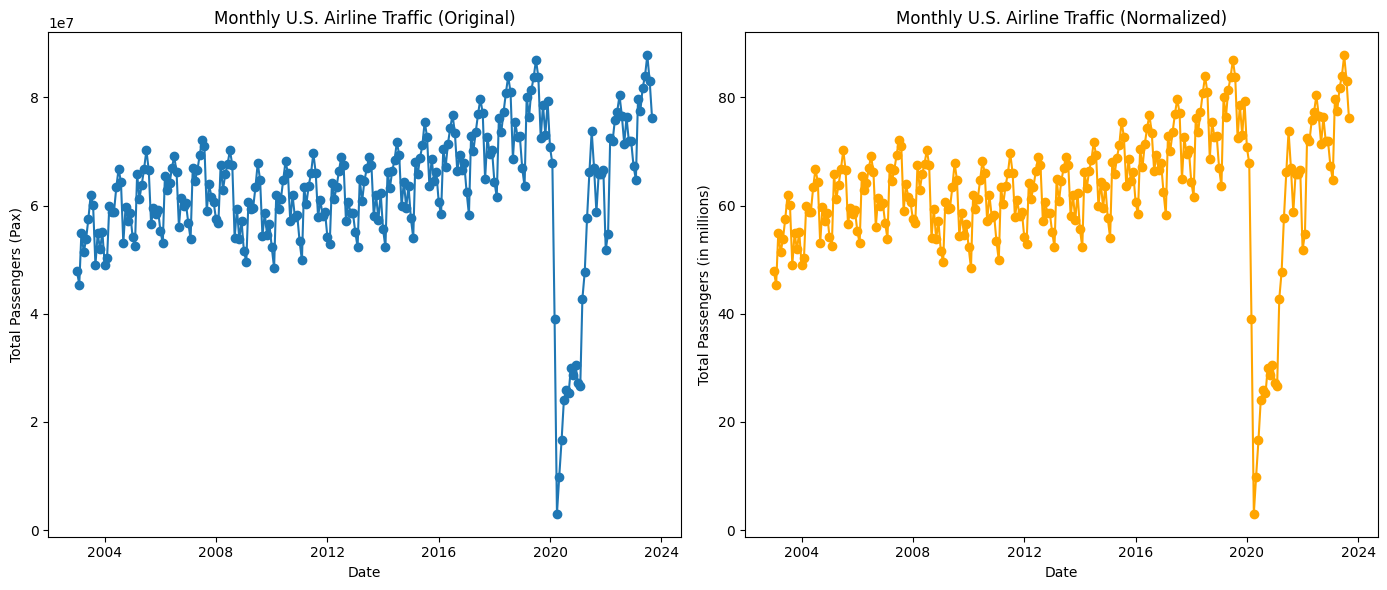

Input shape (samples, seq_length): (239, 10)
Output shape (samples,): (239,)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Loading and Preparing Data
data = pd.read_csv('/content/air traffic.csv')

# Creating datetime column using 'year' and 'month' (day is set to 1)
data['date'] = pd.to_datetime(data[['Year', 'Month']].assign(day=1))

# Sorting data by date
data = data.sort_values('date')


# Cleaning and Convert "Pax" Column
# Removing commas from the Pax column and convert to float
# We'll create a new column for the raw (un-normalized) value
data['Pax_raw'] = data['Pax'].str.replace(',', '').astype(np.float32)

# Normalize Pax by dividing by 1e6
data['Pax_norm'] = data['Pax_raw'] / 1e6


# Plotting the Data
plt.figure(figsize=(14, 6))

# Plotting original data
plt.subplot(1, 2, 1)
plt.plot(data['date'], data['Pax_raw'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Total Passengers (Pax)')
plt.title('Monthly U.S. Airline Traffic (Original)')

# Plotting normalized data
plt.subplot(1, 2, 2)
plt.plot(data['date'], data['Pax_norm'], marker='o', linestyle='-', color='orange')
plt.xlabel('Date')
plt.ylabel('Total Passengers (in millions)')
plt.title('Monthly U.S. Airline Traffic (Normalized)')
plt.tight_layout()
plt.show()


# Creating Sliding-Window Sequences from Normalized Data
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10
values = data['Pax_norm'].values.astype(np.float32)
X, y = create_sequences(values, seq_length)

print("Input shape (samples, seq_length):", X.shape)
print("Output shape (samples,):", y.shape)



Before Implementing the RNN I will split the dataset:

Split Training and Testing

In [4]:
import torch
from torch.utils.data import Dataset, DataLoader

# Split ratios I am using: 70% train, 15% validation, 15% test
total_samples = len(X)
train_size = int(0.7 * total_samples)
val_size = int(0.15 * total_samples)

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        # Expand dims for input_size=1
        self.X = torch.tensor(X).unsqueeze(-1)  # shape: (samples, seq_length, 1)
        self.y = torch.tensor(y).unsqueeze(-1)  # shape: (samples, 1)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]

# Create datasets and dataloaders
batch_size = 32
train_dataset = TimeSeriesDataset(X_train, y_train)
val_dataset = TimeSeriesDataset(X_val, y_val)
test_dataset = TimeSeriesDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size)
test_loader  = DataLoader(test_dataset, batch_size=batch_size)


## Part 1


Part 1 (10 points): Implement your RNN either using an existing framework OR you can
implement your own RNN cell structure. In either case, describe the structure of your
RNN and the activation functions you are using for each time step and in the output
layer. Define a metric you will use to measure the performance of your model (NOTE:
Performance should be measured both for the validation set and the test set).

Reference Code for this RNN:

https://medium.com/@VersuS_/coding-a-recurrent-neural-network-rnn-from-scratch-using-pytorch-a6c9fc8ed4a7

 This BasicRNN model is based on a code in which they have their Github attached that implements a custom RNN block.

 The reference code manually computes the hidden state using linear layers (i2h and h2h) with a tanh activation.


 My implementation adapts this idea by using PyTorch's built-in nn.RNN with tanh nonlinearity followed by a fully connected layer that maps the final hidden state to the output.

In [5]:
import torch
import torch.nn as nn


class BasicRNN(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, output_size=1, num_layers=1):
        super(BasicRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # Defining the recurrent layer like the site does
        # The reference uses a custom RNN block
        # Here, nn.RNN with tanh activation serves a similar purpose.
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, nonlinearity='tanh')

        # Using of a linear layer (h2o) to generate the output like the site does as well
        # Adding a fully connected layer to map the hidden state to the final prediction.
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Init hidden state with zeros like the site does
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Processing input through RNN layer similar to the site
        out, _ = self.rnn(x, h0)

        # Using output from the last time step and pass it through the fully connected layer
        # similar to the linear output (h2o) on the site
        out = self.fc(out[:, -1, :])
        return out

# Instantiate and view the Basic RNN model:
basic_rnn_model = BasicRNN(input_size=1, hidden_size=50, output_size=1, num_layers=1)
print("Basic RNN Model Structure:")
print(basic_rnn_model)



Basic RNN Model Structure:
BasicRNN(
  (rnn): RNN(1, 50, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)


Train and Evaluate Model for RNN and other models in part 2.

In [6]:
import torch.optim as optim

def train_model(model, train_loader, val_loader, num_epochs=100, lr=0.0005):
    # Use GPU if available, otherwise fall back to CPU.
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    # Using Adam optimizer for efficient training with adaptive learning rates.
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Mean Squared Error (MSE)
    criterion = nn.MSELoss()

    # Scheduler reduces the learning rate if the validation loss does not improve,
    # helping the model converge better during later stages of training.
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        # Iterate over batches from the training data loader.
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            # Clear gradients for the current batch
            optimizer.zero_grad()
            # Forward pass
            output = model(batch_X)
            # Compute loss between output and target
            loss = criterion(output, batch_y)
            # Backward pass to compute gradients
            loss.backward()
            # Update model parameters
            optimizer.step()
            # Accumulate the loss scaled by batch size
            train_loss += loss.item() * batch_X.size(0)
        # Average loss over all training data
        train_loss /= len(train_loader.dataset)
        # Switch the model to evaluation mode for validation
        model.eval()
        val_loss = 0
        # No need to track gradients during validation
        with torch.no_grad():
            for batch_X, batch_y in val_loader:
                batch_X, batch_y = batch_X.to(device), batch_y.to(device)
                output = model(batch_X)
                loss = criterion(output, batch_y)
                val_loss += loss.item() * batch_X.size(0)
        # Average validation loss
        val_loss /= len(val_loader.dataset)

        # Adjusting learning rate based on the validation loss.
        scheduler.step(val_loss)
        print(f"Epoch {epoch+1}/{num_epochs}  Train Loss: {train_loss:.4f}  Val Loss: {val_loss:.4f}")

    return model

def evaluate_model(model, test_loader):
    # Use GPU if available for evaluation.
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    # Using MSE for consistency in evaluation metric
    criterion = nn.MSELoss()
    # Setting model to eval mode
    model.eval()
    test_loss = 0
    # No gradients needed during evaluation
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            output = model(batch_X)
            loss = criterion(output, batch_y)
            test_loss += loss.item() * batch_X.size(0)
    # Average loss over the test set
    test_loss /= len(test_loader.dataset)
    print(f"Test Loss: {test_loss:.4f}")


In [ ]:
print("Training Basic RNN Model:")
basic_rnn_model = train_model(basic_rnn_model, train_loader, val_loader, num_epochs=50, lr=0.001)
evaluate_model(basic_rnn_model, test_loader)


Training Basic RNN Model:
Epoch 1/50  Train Loss: 2184.2647  Val Loss: 2880.0882
Epoch 2/50  Train Loss: 2155.7823  Val Loss: 2850.3507
Epoch 3/50  Train Loss: 2127.8188  Val Loss: 2820.7269
Epoch 4/50  Train Loss: 2100.0913  Val Loss: 2791.3358
Epoch 5/50  Train Loss: 2072.4955  Val Loss: 2762.2595
Epoch 6/50  Train Loss: 2045.2506  Val Loss: 2733.4631
Epoch 7/50  Train Loss: 2018.1242  Val Loss: 2705.0186
Epoch 8/50  Train Loss: 1991.4371  Val Loss: 2676.6611
Epoch 9/50  Train Loss: 1964.8420  Val Loss: 2648.5388
Epoch 10/50  Train Loss: 1938.6752  Val Loss: 2620.6368
Epoch 11/50  Train Loss: 1912.4780  Val Loss: 2593.1932
Epoch 12/50  Train Loss: 1886.9303  Val Loss: 2565.9215
Epoch 13/50  Train Loss: 1861.3193  Val Loss: 2539.0423
Epoch 14/50  Train Loss: 1836.2541  Val Loss: 2512.2353
Epoch 15/50  Train Loss: 1811.3416  Val Loss: 2485.7304
Epoch 16/50  Train Loss: 1786.5372  Val Loss: 2459.6823
Epoch 17/50  Train Loss: 1762.2199  Val Loss: 2433.8067
Epoch 18/50  Train Loss: 1737.9

Describe the structure of your
RNN and the activation functions you are using for each time step and in the output
layer. Define a metric you will use to measure the performance of your model (NOTE:
Performance should be measured both for the validation set and the test set).

Answer:

* My RNN model consists of a recurrent
layer that processes the input sequentially and updates its hidden state at each time step using the tanh activation function. After the model processes all time steps, it takes the hidden state from the final time step and passes it through a fully connected linear output layer. No additional activation function is applied in the output layer because the model is trained using Mean Squared Error loss, which is appropriate for regression-like tasks. In the training code, performance is measured by calculating the average MSE loss on the validation set during training and on the test set after training. The validation loss is used to monitor overfitting and to adjust the learning rate dynamically with a scheduler. The test loss provides an unbiased evaluation of the model's performance on unseen data. This approach contrasts with the more complex architectures such as LSTM and GRU, which use additional gates and memory cells to capture long-term dependencies, resulting in lower loss values in those implementations.



## Part 2

Update your network from part 1 with first an LSTM and then a GRU
based cell structure (You can treat both as 2 separate implementations). Re-do the
training and performance evaluation. What are the major differences you notice? Why
do you think those differences exist between the 3 implementations (basic RNN, LSTM
and GRU)

## LSTM

In [12]:
# Website Reference:
# https://medium.com/@wangdk93/lstm-from-scratch-c8b4baf06a8b

import torch
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=256, output_size=1, num_layers=2, dropout=0.3):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # The LSTM layer is similar to the site's version,
        # I have added dropout between layers for extra regularization which is not done there
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)

        # Mapping the last hidden state to a single output.
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        batch_size = x.size(0)
        # Initialize hidden and cell states just like the site
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)

        # Forward pass through the LSTM as the site does
        out, _ = self.lstm(x, (h0, c0))

        # Use the output from the last time step and map it
        # through the linear layer which is similar as well
        out = self.fc(out[:, -1, :])
        return out

# Instantiate/view the model
lstm_model = LSTMModel(input_size=1, hidden_size=256, output_size=1, num_layers=2, dropout=0.3)
print("LSTMModel Stats: ")
print(lstm_model)


LSTMModel Stats: 
LSTMModel(
  (lstm): LSTM(1, 256, num_layers=2, batch_first=True, dropout=0.3)
  (fc): Linear(in_features=256, out_features=1, bias=True)
)


## GRU

In [13]:
import torch
import torch.nn as nn

# Referenced from this GitHub Repo
# https://github.com/gursi26/gru-from-scratch/blob/main/gru.py

class GRUModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=256, output_size=1, num_layers=2, dropout=0.3):
        super(GRUModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        # GRU layer using PyTorch’s built-in GRU, which internally performs operations similar
        # to the custom GRUCell (computing relevance/reset, update, and candidate gates)
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        # Fully connected layer which maps the final hidden state to the prediction
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        batch_size = x.size(0)
        # Init hidden state which this parallels the initial state 'h' in the repo
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)
        # Forward pass through GRU: the built-in GRU performs gate calculations similarly to the Repo.
        out, _ = self.gru(x, h0)
        # Use the output from the last time step (similar to extracting the final hidden state from a GRUCell loop)
        out = self.fc(out[:, -1, :])
        return out

# Instantiating and viewing model
gru_model = GRUModel(input_size=1, hidden_size=256, output_size=1, num_layers=2, dropout=0.3)
print("GRUModel:")
print(gru_model)


GRUModel:
GRUModel(
  (gru): GRU(1, 256, num_layers=2, batch_first=True, dropout=0.3)
  (fc): Linear(in_features=256, out_features=1, bias=True)
)


In [ ]:
# Train and evaluate LSTMModel
print("Training LSTMModel:")
lstm_model = train_model(lstm_model, train_loader, val_loader, num_epochs=100, lr=0.0005)
evaluate_model(lstm_model, test_loader)

# Train and evaluate GRUModel
print("Training GRUModel:")
gru_model = train_model(gru_model, train_loader, val_loader, num_epochs=100, lr=0.0005)
evaluate_model(gru_model, test_loader)

Training LSTMModel:
Epoch 1/100  Train Loss: 67.8153  Val Loss: 544.1999
Epoch 2/100  Train Loss: 60.4668  Val Loss: 533.9024
Epoch 3/100  Train Loss: 54.6991  Val Loss: 524.9704
Epoch 4/100  Train Loss: 50.2711  Val Loss: 517.4914
Epoch 5/100  Train Loss: 46.8587  Val Loss: 511.3957
Epoch 6/100  Train Loss: 44.0397  Val Loss: 507.0200
Epoch 7/100  Train Loss: 42.6388  Val Loss: 503.1151
Epoch 8/100  Train Loss: 41.4784  Val Loss: 500.1576
Epoch 9/100  Train Loss: 41.0497  Val Loss: 497.8546
Epoch 10/100  Train Loss: 40.6806  Val Loss: 496.5002
Epoch 11/100  Train Loss: 40.6489  Val Loss: 495.3367
Epoch 12/100  Train Loss: 40.6201  Val Loss: 494.7502
Epoch 13/100  Train Loss: 40.6397  Val Loss: 494.5518
Epoch 14/100  Train Loss: 40.6371  Val Loss: 494.7696
Epoch 15/100  Train Loss: 40.6277  Val Loss: 494.7351
Epoch 16/100  Train Loss: 40.6298  Val Loss: 495.0131
Epoch 17/100  Train Loss: 40.6134  Val Loss: 495.1579
Epoch 18/100  Train Loss: 40.6164  Val Loss: 495.2334
Epoch 19/100  Tra

What are the major differences you notice? Why do you think those differences exist between the 3 implementations (basic RNN, LSTM
and GRU)?


Answer:

* The basic RNN shows a much higher loss compared to the LSTM and GRU, likely due to its inability to effectively capture long-term dependencies and combat vanishing gradients. The LSTM achieves a low and stable training loss, indicating its superior capability in maintaining and updating memory over time with its complex gating mechanisms. The GRU, while also incorporating gates to handle long-term dependencies, reaches a loss value that is lower than the basic RNN but higher than the LSTM. These differences exist because the LSTM has a more sophisticated architecture with separate cell and hidden states, which allows it to better preserve and control information flow. The GRU combines some of these gates and may sometimes be faster but can result in slightly less precise learning in certain tasks. The basic RNN lacks these advanced mechanisms entirely, which leads to poorer performance. The architectural improvements in LSTM and GRU contribute to their better performance on tasks requiring memory over time, as demonstrated by the differences in training and test loss.

## Part 3

Can you use the traditional feed-forward network to solve the same
problem.

Why or why not? (Hint: Can time series data be converted to usual features
that can be used as input to a feed-forward network?)

In [ ]:
import torch
import torch.nn as nn

# Reference :
# https://www.geeksforgeeks.org/feedforward-neural-network/

class FeedForwardNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedForwardNN, self).__init__()
        # Inspired by the site's Keras example, we use a dense layer with ReLU activation.
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        # Final dense layer maps to the output.
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Flatten the input similar to the Keras Flatten layer.
        x = x.view(x.size(0), -1)
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Instantiate the model: here, input_dim is set to seq_length, hidden_dim to 50, and output_dim to 1.
ffn_model = FeedForwardNN(input_dim=seq_length, hidden_dim=50, output_dim=1)
print(ffn_model)


FeedForwardNN(
  (fc1): Linear(in_features=10, out_features=50, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=50, out_features=1, bias=True)
)


In [ ]:
print("Training Feed-Forward NN Model:")
ffn_model = train_model(ffn_model, train_loader, val_loader, num_epochs=50, lr=0.001)
evaluate_model(ffn_model, test_loader)


Training Feed-Forward NN Model:
Epoch 1/50  Train Loss: 3463.7929  Val Loss: 2952.6907
Epoch 2/50  Train Loss: 2037.1844  Val Loss: 1665.1309
Epoch 3/50  Train Loss: 1044.2342  Val Loss: 916.5299
Epoch 4/50  Train Loss: 444.4659  Val Loss: 604.1125
Epoch 5/50  Train Loss: 146.5762  Val Loss: 594.2664
Epoch 6/50  Train Loss: 59.2001  Val Loss: 707.4990
Epoch 7/50  Train Loss: 68.5474  Val Loss: 794.4185
Epoch 8/50  Train Loss: 83.3540  Val Loss: 797.4462
Epoch 9/50  Train Loss: 77.3748  Val Loss: 741.7851
Epoch 10/50  Train Loss: 63.3017  Val Loss: 683.8640
Epoch 11/50  Train Loss: 55.6760  Val Loss: 651.2826
Epoch 12/50  Train Loss: 54.3554  Val Loss: 643.2118


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 13/50  Train Loss: 54.5271  Val Loss: 638.5485
Epoch 14/50  Train Loss: 54.5186  Val Loss: 637.6701
Epoch 15/50  Train Loss: 54.3782  Val Loss: 640.6795
Epoch 16/50  Train Loss: 54.2206  Val Loss: 641.3199
Epoch 17/50  Train Loss: 54.1444  Val Loss: 640.2489
Epoch 18/50  Train Loss: 54.0436  Val Loss: 640.7156
Epoch 19/50  Train Loss: 53.9886  Val Loss: 640.0691
Epoch 20/50  Train Loss: 53.9521  Val Loss: 639.0704
Epoch 21/50  Train Loss: 53.9073  Val Loss: 637.7685
Epoch 22/50  Train Loss: 53.8926  Val Loss: 636.1973
Epoch 23/50  Train Loss: 53.8448  Val Loss: 635.3077
Epoch 24/50  Train Loss: 53.8256  Val Loss: 635.4810
Epoch 25/50  Train Loss: 53.7794  Val Loss: 636.0653
Epoch 26/50  Train Loss: 53.7471  Val Loss: 636.9944
Epoch 27/50  Train Loss: 53.6890  Val Loss: 636.9769
Epoch 28/50  Train Loss: 53.6426  Val Loss: 635.7844
Epoch 29/50  Train Loss: 53.6459  Val Loss: 635.2219
Epoch 30/50  Train Loss: 53.6124  Val Loss: 635.3355
Epoch 31/50  Train Loss: 53.6007  Val Loss: 63

Can you use the traditional feed-forward network to solve the same
problem. Why or why not? (Hint: Can time series data be converted to usual features
that can be used as input to a feed-forward network?)

Answer:
* A traditional feed-forward network can be applied to time series data if the sequence is converted into a fixed feature vector. In my implementation the input sequence is flattened into a one-dimensional vector before being processed. This conversion allows the network to receive the entire sequence as a set of features but it does not preserve the temporal order of the data. Recurrent models such as LSTM and GRU are specifically designed to capture the order and dependencies present in sequential data. The experimental results show that recurrent networks tend to achieve lower loss values and better performance on time series tasks. Flattening the data for a feed-forward network may work for simple or short sequences but it loses important information about how the values evolve over time. In many cases the temporal relationships are key to solving the problem and using recurrent models is a better approach.

## Task 3


## Part 1

Part 1: Implementing Word Embeddings

• Use a pre-trained word embedding model (Word2Vec, GloVe, FastText, or BERT
embeddings).

• Provide a comparative discussion on why you chose this embedding over others.

• Load embeddings efficiently (either from pre-trained vectors or using an NLP library like
Gensim, SpaCy, or Hugging Face).

• Allow dynamic user input of two words and output their respective embeddings.

• Handle cases where a word is out of vocabulary (OOV) and suggest ways to approximate
its embedding.

In [1]:
import gensim.downloader as api
import numpy as np

# Loading pre-trained Word2Vec model (Google News vectors)
print("Loading from pre-trained Word2Vec model")
# Loading 300-dimensional embeddings from Google News
model = api.load("word2vec-google-news-300")
print("Model has loaded")

def get_embedding(word, model, oov_strategy="zero"):
    # Check if the word is in the model's vocabulary
    if word in model.key_to_index:
        # Return the embedding if found
        return model[word]
    else:
        print(f"'{word}' is out-of-vocabulary (OOV).")
        # Handle out-of-vocabulary words based on the chosen strategy
        if oov_strategy == "average":
            # Returning avg embedding of all words
            avg = np.mean(model.vectors, axis=0)
            return avg
        elif oov_strategy == "zero":
            # Returning zero vector if the word is OOV
            return np.zeros(model.vector_size)
        else:
            # Default option: return a zero vector
            return np.zeros(model.vector_size)

# Get user input for two words
word1 = input("Enter the first word: ").strip()
word2 = input("Enter the second word: ").strip()

# Retrieve embeddings for both words using the defined OOV strategy
emb1 = get_embedding(word1, model, oov_strategy="zero")
emb2 = get_embedding(word2, model, oov_strategy="zero")

# Print out the embeddings for inspection
print(f"\nEmbedding for '{word1}':\n", emb1)
print(f"\nEmbedding for '{word2}':\n", emb2)



Loading from pre-trained Word2Vec model
[==================================================] 100.0% 1662.8/1662.8MB downloaded
Model has loaded
Enter the first word: trees
Enter the second word: forest

Embedding for 'trees':
 [ 4.96093750e-01  2.22656250e-01  1.31225586e-02  1.10839844e-01
 -2.61718750e-01 -1.72851562e-01  9.13085938e-02  1.71875000e-01
  4.29687500e-02  3.37890625e-01  8.64257812e-02 -2.69531250e-01
 -3.88183594e-02  1.20117188e-01 -3.32031250e-02 -1.97265625e-01
 -2.08007812e-01 -8.05664062e-02 -1.19628906e-01  3.08593750e-01
 -1.08398438e-01 -1.07421875e-01  8.48388672e-03 -1.81640625e-01
  6.34765625e-02 -1.81640625e-01 -2.51953125e-01 -8.39843750e-02
  1.51367188e-01 -2.61718750e-01 -6.44531250e-02 -8.23974609e-03
 -7.47070312e-02 -2.37304688e-01  2.20947266e-02 -2.89062500e-01
 -2.07031250e-01 -3.71093750e-01  4.07714844e-02  1.55273438e-01
  1.21582031e-01 -1.75781250e-01  1.94335938e-01 -2.73437500e-01
  1.74804688e-01 -4.29687500e-01 -2.92968750e-01 -2.648925

Provide a comparative discussion on why you chose this embedding over others.

Answer:

* I chose the Word2Vec embeddings because they are extensively validated and have been shown to capture semantic and syntactic relationships effectively. The Google News Word2Vec model is well-regarded for its broad training data and high quality representations. This model provides a good balance between performance and computational efficiency when compared to alternatives such as GloVe, FastText, or BERT embeddings. Using Gensim to load Word2Vec embeddings allows for efficient access and querying of the vectors. I also incorporated a strategy to handle out-of-vocabulary words, ensuring that even if a word is not present in the model's vocabulary, the system can approximate its embedding using either an average or zero vector. This dynamic approach to input and OOV handling makes the solution strengthened and practical for real world applications.

This is for a case where a word is out of the vocabulary

In [2]:
import gensim.downloader as api
import numpy as np

# Loading pre-trained Word2Vec model (Google News vectors)
print("Loading from pre-trained Word2Vec model")
# Loading 300-dimensional embeddings from Google News
model = api.load("word2vec-google-news-300")
print("Model has loaded")

def get_embedding(word, model, oov_strategy="zero"):
    # Check if the word is in the model's vocabulary
    if word in model.key_to_index:
        # Return the embedding if found
        return model[word]
    else:
        print(f"'{word}' is out-of-vocabulary (OOV).")
        # Handle out-of-vocabulary words based on the chosen strategy
        if oov_strategy == "average":
            # Returning avg embedding of all words
            avg = np.mean(model.vectors, axis=0)
            return avg
        elif oov_strategy == "zero":
            # Returning zero vector if the word is OOV
            return np.zeros(model.vector_size)
        else:
            # Default option: return a zero vector
            return np.zeros(model.vector_size)

# Get user input for two words
word1 = input("Enter the first word: ").strip()
word2 = input("Enter the second word: ").strip()

# Retrieve embeddings for both words using the defined OOV strategy
emb1 = get_embedding(word1, model, oov_strategy="zero")
emb2 = get_embedding(word2, model, oov_strategy="zero")

# Print out the embeddings for inspection
print(f"\nEmbedding for '{word1}':\n", emb1)
print(f"\nEmbedding for '{word2}':\n", emb2)


Loading pre-trained Word2Vec model
Model has loaded 
Enter the first word: prw
Enter the second word: olz
'prw' is out-of-vocabulary (OOV).
'olz' is out-of-vocabulary (OOV).

Embedding for 'prw':
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.


## Part 2: Cosine Similarity Computation

• Implement a function that computes the cosine similarity between two-word
embeddings.

• Allow batch processing, where users can input multiple word pairs for simultaneous similarity computation.

• Visualization Requirement: Create a 2D or 3D scatter plot (e.g., using PCA or t-SNE) to
visually show how similar and dissimilar words cluster together in the embedding space.

Explain why cosine similarity is useful in word embedding space.

Read about it from here:
https://www.geeksforgeeks.org/cosine-similarity/



Cosine similarity is useful in word embedding space because it measures the orientation between vectors rather than their magnitudes. For word embeddings, words that are semantically similar tend to have similar directions even if their vector lengths are different. By calculating the cosine of the angle between two word vectors, one obtains a measure that reflects their relative similarity. This approach helps in identifying relationships between words regardless of how often they appear in the training data, as the scale of the embeddings does not influence the cosine similarity. For example, in the provided code, after obtaining embeddings for two words, you could use cosine similarity to determine how similar these words are in meaning. This makes cosine similarity a standard metric in many natural language processing tasks, including synonym detection, clustering, and information retrieval.



Cosine similarity between 'trees' and 'forest': 0.4835

Batch cosine similarities:
computer - internet: 0.4069
city - village: 0.4790
ocean - mountain: 0.2728
music - art: 0.4010


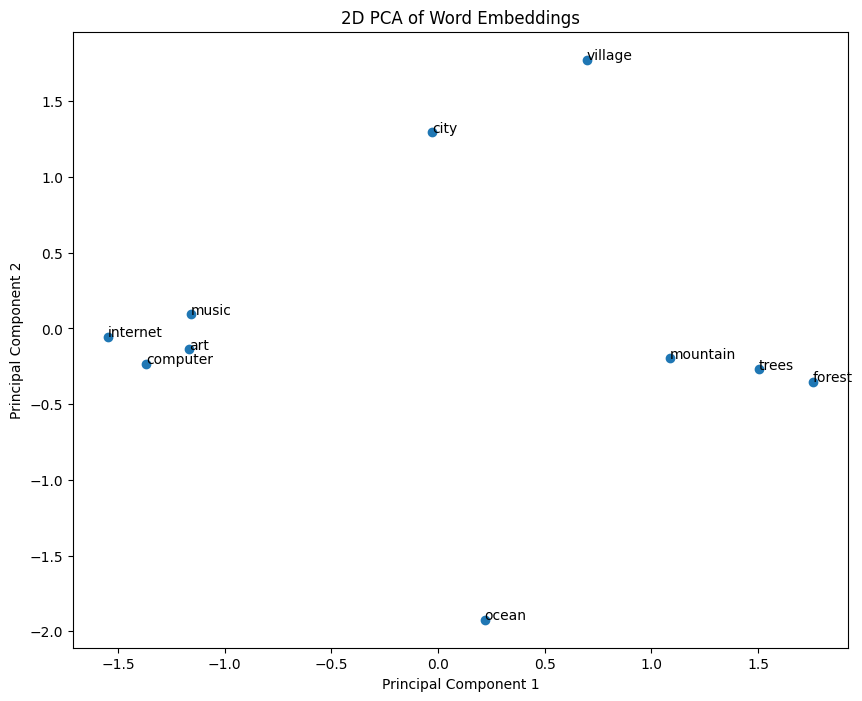

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def cosine_similarity(vec1, vec2):
    """Compute cosine similarity between two vectors."""
    dot = np.dot(vec1, vec2)
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    if norm1 == 0 or norm2 == 0:
        return 0.0  # Avoid division by zero (e.g., in OOV case)
    return dot / (norm1 * norm2)

# Compute cosine similarity for our two input words:
sim = cosine_similarity(emb1, emb2)
print(f"\nCosine similarity between '{word1}' and '{word2}': {sim:.4f}")

# Batch processing: function to compute cosine similarity for a list of word pairs.
def batch_cosine_similarity(word_pairs, model, oov_strategy="zero"):
    results = []
    for w1, w2 in word_pairs:
        vec1 = get_embedding(w1, model, oov_strategy)
        vec2 = get_embedding(w2, model, oov_strategy)
        sim_val = cosine_similarity(vec1, vec2)
        results.append(((w1, w2), sim_val))
    return results

# Example batch word pairs:
word_pairs = [("computer", "internet"), ("city", "village"), ("ocean", "mountain"), ("music", "art")]
batch_results = batch_cosine_similarity(word_pairs, model)
print("\nBatch cosine similarities:")
for pair, sim_val in batch_results:
    print(f"{pair[0]} - {pair[1]}: {sim_val:.4f}")

# Visualization: Plot embeddings for a selection of words using PCA.
words_to_plot = ["computer", "internet", "city", "village", "ocean", "mountain", "music", "art", word1, word2]
embeddings = np.array([get_embedding(w, model, oov_strategy="zero") for w in words_to_plot])

# Reduce dimensions to 2D using PCA.
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
for i, word in enumerate(words_to_plot):
    plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]))
plt.title("2D PCA of Word Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


## Part 3: Designing a Novel Dissimilarity Metric

* Define a custom dissimilarity score that goes beyond cosine similarity. Possible
approaches include:
  * Euclidean distance (How far apart words are in vector space).
  * Word entropy-based dissimilarity (How uncommon two words are relative to
each other in corpora).
  * Semantic contrast measure (Using external knowledge bases like WordNet).

* Either design your own metric or cite an existing one from literature (provide a proper
reference). Explain why your metric captures novelty/diversity better than cosine
similarity alone.


*  Allow users to toggle between different similarity/dissimilarity measures via function
parameters.


* Visualization Requirement:
  * Plot the ranking of words based on their similarity/dissimilarity to a given word
(e.g., how words like "cat" rank against "dog," "lion," and "table" using different
metrics).
  *  Use a heatmap to demonstrate and compare similarity and dissimilarity across
multiple (any number of your choice) word pairs.


Ranking based on Cosine Similarity for 'ocean':
sea: 0.7644
lake: 0.4985
river: 0.4772
island: 0.4105
desert: 0.3668
sky: 0.3444
forest: 0.2808
mountain: 0.2728

Ranking based on Euclidean Distance for 'ocean':
sea: 2.0216
lake: 3.0356
river: 3.1593
island: 3.1853
desert: 3.4863
sky: 3.5399
mountain: 3.6346
forest: 3.7533

Score Comparison:
          Cosine Similarity  Euclidean Distance
Word                                           
sea                0.764354            2.021587
river              0.477181            3.159280
lake               0.498543            3.035608
mountain           0.272778            3.634614
forest             0.280809            3.753267
desert             0.366842            3.486283
sky                0.344429            3.539925
island             0.410452            3.185303


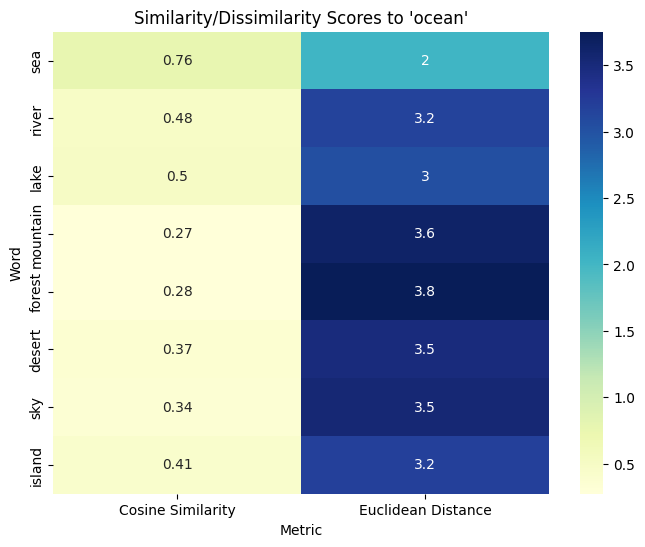

In [10]:
import seaborn as sns
import pandas as pd

def euclidean_distance(vec1, vec2):
    # Compute Euclidean distance between two vectors
    return np.linalg.norm(vec1 - vec2)

def similarity_metric(word1, word2, model, metric="cosine", oov_strategy="zero"):
    # Retrieve embeddings and compute similarity (cosine) or dissimilarity (Euclidean)
    vec1 = get_embedding(word1, model, oov_strategy)
    vec2 = get_embedding(word2, model, oov_strategy)
    if metric == "cosine":
        return cosine_similarity(vec1, vec2)
    elif metric == "euclidean":
        return euclidean_distance(vec1, vec2)
    else:
        raise ValueError("Unsupported metric. Choose 'cosine' or 'euclidean'.")

def rank_words(target_word, word_list, model, metric="cosine", oov_strategy="zero"):
    # Rank words based on similarity/dissimilarity to the target word
    scores = {}
    for w in word_list:
        scores[w] = similarity_metric(target_word, w, model, metric, oov_strategy)
    # For cosine similarity, higher scores indicate more similarity; for Euclidean, lower scores indicate more similarity.
    ranked = sorted(scores.items(), key=lambda item: item[1], reverse=(metric=="cosine"))
    return ranked

# New target and words for ranking
target = "ocean"
words_for_ranking = ["sea", "river", "lake", "mountain", "forest", "desert", "sky", "island"]

rank_cosine = rank_words(target, words_for_ranking, model, metric="cosine")
rank_euclidean = rank_words(target, words_for_ranking, model, metric="euclidean")

print(f"\nRanking based on Cosine Similarity for '{target}':")
for word, score in rank_cosine:
    print(f"{word}: {score:.4f}")

print(f"\nRanking based on Euclidean Distance for '{target}':")
for word, score in rank_euclidean:
    print(f"{word}: {score:.4f}")

# Visualization: Create a heatmap comparing cosine similarity and Euclidean distance scores
data_dict = {"Word": words_for_ranking}
cosine_scores = [similarity_metric(target, w, model, "cosine") for w in words_for_ranking]
euclidean_scores = [similarity_metric(target, w, model, "euclidean") for w in words_for_ranking]
data_dict["Cosine Similarity"] = cosine_scores
data_dict["Euclidean Distance"] = euclidean_scores

df = pd.DataFrame(data_dict).set_index("Word")
print("\nScore Comparison:")
print(df)

plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap="YlGnBu")
plt.title(f"Similarity/Dissimilarity Scores to '{target}'")
plt.xlabel("Metric")
plt.ylabel("Word")
plt.show()



Explain why your metric captures novelty/diversity better than cosine similarity alone:

Here is also a link for types of metrics to use in which I looked into Euclidean Distance and Cosine : https://towardsdatascience.com/17-types-of-similarity-and-dissimilarity-measures-used-in-data-science-3eb914d2681/


Based on the information from the site, cosine similarity focuses on the angle between vectors and captures whether words point in a similar direction, regardless of their magnitude. This means that it might overlook cases where words, while having similar directions, differ significantly in their actual values. Euclidean distance measures the absolute distance between vectors and can capture these magnitude differences, which highlights diversity that cosine similarity alone might miss. While cosine similarity tells us how similarly two words are oriented in the embedding space, Euclidean distance provides additional insight into how far apart they are. This extra information is especially useful when trying to detect unique word representations that are not obvious from directional similarity alone.

Observations on the data:

The cosine similarity ranking shows that "sea" is most similar to "ocean" (0.7644), while "forest" is least similar (0.2808). This indicates that the directional similarity in the embedding space captures semantic closeness; words associated with water, like "sea," "lake," and "river," which have higher similarity scores. The Euclidean distance results confirm this pattern by assigning lower distance values to more similar words, with "sea" again having the lowest distance (2.0216) and "forest" the highest (3.7533). Both metrics agree that "sea" is most related to "ocean" and that terms like "mountain" and "forest" are more dissimilar.